In [1]:
# the goal is to find out the period of the GT RSV for term of Depression

In [25]:
#import necessary libraries 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20,10]
import seaborn as sns
import numpy as np

In [26]:
# depression file is saved in this directory 
directory = 'c:/Users/nafis/Documents/master_thesis_dir/thesis/google_trend_data/GT_update/df_total_all_hours_11_2022.csv'

In [27]:
df =pd.read_csv(directory, parse_dates =['date'] , index_col = 'date')


In [28]:
df.head()

,ahdistus,clinical depression,crippling depression,depression symptoms,depression test,depression,high functioning depression,itsemurha,kaksisuuntainen mielialahäiriö,keskivaikea masennus,...,nuorten masennus,postpartum depression,psykoosi,psykoottinen masennus,raskaus masennus,suicide,synnytyksen jälkeinen masennus,vaikea masennus,vakava masennus,väsymys
date,,,,,,,,,,,,,,,,,,,,,
2015-01-01 00:00:00,14.0,0.0,NaN,0.0,0.0,14.0,NaN,51.0,7.0,0.0,...,0.0,0.0,29.0,0.0,37.0,64.0,0.0,0.0,0.0,10.0
2015-01-01 01:00:00,12.0,0.0,NaN,48.0,31.0,36.0,NaN,22.0,29.0,0.0,...,0.0,0.0,7.0,0.0,53.0,70.0,0.0,0.0,0.0,33.0
2015-01-01 02:00:00,11.0,0.0,NaN,0.0,0.0,52.0,NaN,62.0,41.0,0.0,...,0.0,0.0,27.0,0.0,0.0,48.0,12.0,65.0,0.0,16.0
2015-01-01 03:00:00,7.0,0.0,NaN,0.0,0.0,20.0,NaN,25.0,18.0,0.0,...,0.0,0.0,14.0,0.0,0.0,21.0,0.0,0.0,0.0,21.0
2015-01-01 04:00:00,0.0,0.0,NaN,100.0,0.0,11.0,NaN,18.0,0.0,0.0,...,0.0,0.0,63.0,0.0,0.0,29.0,0.0,0.0,0.0,53.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52608 entries, 2015-01-01 00:00:00 to 2020-12-31 23:00:00
Data columns (total 36 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ahdistus                        52273 non-null  float64
 1   clinical depression             52106 non-null  float64
 2   crippling depression            44050 non-null  float64
 3   depression symptoms             51438 non-null  float64
 4   depression test                 50433 non-null  float64
 5   depression                      52273 non-null  float64
 6   high functioning depression     34002 non-null  float64
 7   itsemurha                       52273 non-null  float64
 8   kaksisuuntainen mielialahäiriö  52106 non-null  float64
 9   keskivaikea masennus            52273 non-null  float64
 10  krooninen masennus              52273 non-null  float64
 11  lapsen masennus                 52273 non-null  float64
 1

In [29]:
# terms from agglomerative clustering with two cluster
cluster_terms = ['ahdistus', 'depression', 'itsemurha', 'kaksisuuntainen mielialahäiriö', 'masennus oireet', 
             'masennus', 'masennuslääkkeet', 'masennustesti', 'mielenterveys', 'psykoosi', 'suicide', 'väsymys']

In [30]:
df_cluster = df.loc[:, cluster_terms]

In [31]:
df_cluster.head()

,ahdistus,depression,itsemurha,kaksisuuntainen mielialahäiriö,masennus oireet,masennus,masennuslääkkeet,masennustesti,mielenterveys,psykoosi,suicide,väsymys
date,,,,,,,,,,,,
2015-01-01 00:00:00,14.0,14.0,51.0,7.0,11.0,22.0,12.0,17.0,27.0,29.0,64.0,10.0
2015-01-01 01:00:00,12.0,36.0,22.0,29.0,0.0,18.0,0.0,12.0,61.0,7.0,70.0,33.0
2015-01-01 02:00:00,11.0,52.0,62.0,41.0,12.0,31.0,0.0,18.0,11.0,27.0,48.0,16.0
2015-01-01 03:00:00,7.0,20.0,25.0,18.0,16.0,14.0,0.0,0.0,0.0,14.0,21.0,21.0
2015-01-01 04:00:00,0.0,11.0,18.0,0.0,0.0,8.0,0.0,0.0,32.0,63.0,29.0,53.0


In [32]:
df_cluster_melted = df_cluster.melt(ignore_index = False)
df_cluster_melted

,variable,value
date,,
2015-01-01 00:00:00,ahdistus,14.0
2015-01-01 01:00:00,ahdistus,12.0
2015-01-01 02:00:00,ahdistus,11.0
2015-01-01 03:00:00,ahdistus,7.0
2015-01-01 04:00:00,ahdistus,0.0
...,...,...
2020-12-31 19:00:00,väsymys,32.0
2020-12-31 20:00:00,väsymys,27.0
2020-12-31 21:00:00,väsymys,19.0


In [159]:
# to chekc if the data is stationart from point of trend 
from statsmodels.tsa.stattools import adfuller
fuller_dep = adfuller(df_cluster_melted['value'].dropna())

In [18]:
fuller_dep # considering the p value which is much less than 0.05 the null hypotisis is rejected and the dataframe is stationary

(-29.672889252463854,
 0.0,
 107,
 626667,
 {'1%': -3.430360435090385,
  '5%': -2.8615446121891797,
  '10%': -2.566772454899464},
 5075108.505380127)

### interpretation of Dicky fuller test
- First data point: -16.667749106704257: Critical value of the data 
- Second data point: 1.5543926017602993e-29: Probability that null hypothesis will not be rejected(p-value)

- Third data point: 58: Number of lags used in regression to determine t-statistic. So there are  auto correlations going back to '58' periods here.

- Forth data point: 52214: Number of observations used in the analysis.

- Fifth data point: {'1%': -3.4304752465146087,  '5%': -2.861595356438964,  '10%': -2.56679946439265}: T values corresponding to adfuller test.

- Since critical value -16.667749106704257<-3.43,-2.86,-2.56 (t-values at 1%,5%and 10% confidence intervals), null hypothesis is rejected. So there the data is <b> stationarity</b>.

### analysis mean of the RSVs of the cluster terms

In [11]:
seri_cluster_mean  = df_cluster.fillna(0).mean(axis = 1)

In [12]:

df_cluster_mean = pd.Series.to_frame(seri_cluster_mean, name="RSV")

In [33]:
df_cluster_mean

,RSV
date,
2015-01-01 00:00:00,23.166667
2015-01-01 01:00:00,25.000000
2015-01-01 02:00:00,27.416667
2015-01-01 03:00:00,13.000000
2015-01-01 04:00:00,17.833333
...,...
2020-12-31 19:00:00,17.666667
2020-12-31 20:00:00,19.500000
2020-12-31 21:00:00,15.000000


Text(0, 0.5, 'RSV')

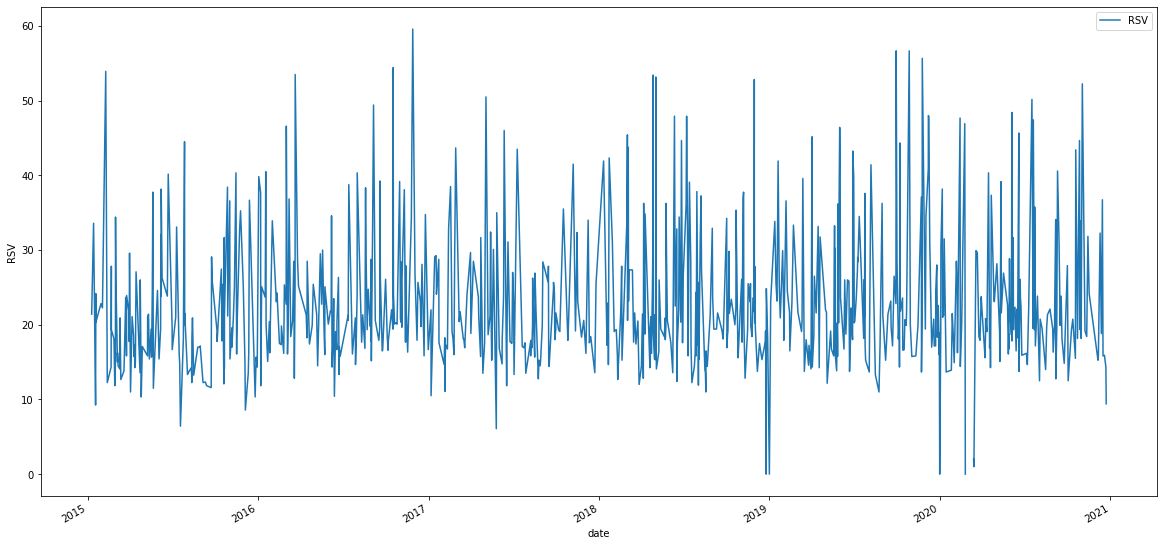

In [27]:
# plot a smaple with 800 
fig, ax = plt.subplots()
df_cluster_mean.sample(800).plot(ax = ax)
plt.ylabel('RSV')

In [28]:
window_size = 2
windowed = df_cluster_mean.rolling(window=window_size)
df_smooth = windowed.mean()

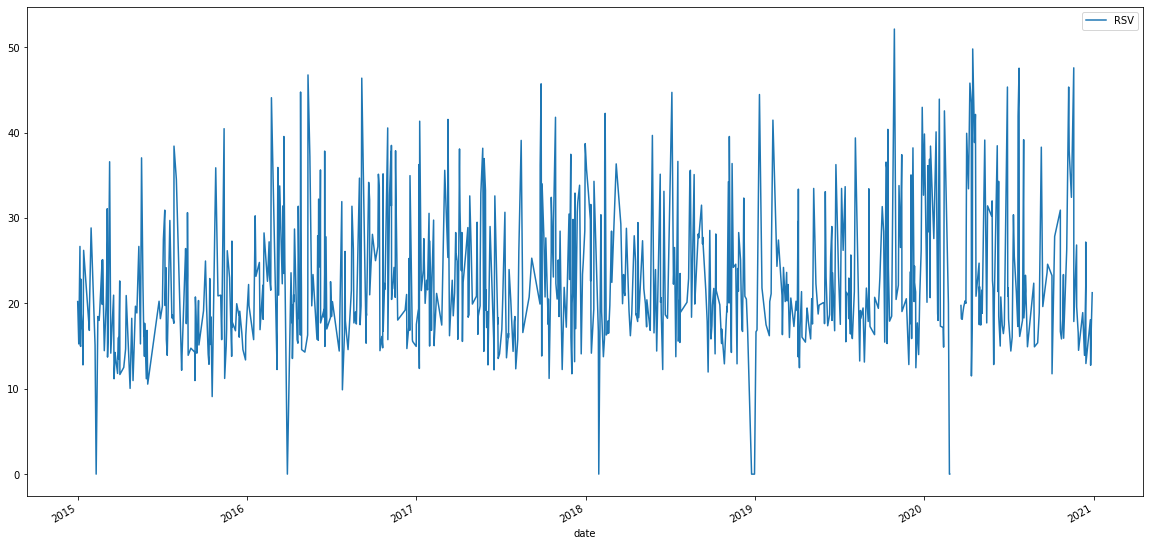

In [31]:
# fig, axs = plt.subplots(1, 1, figsize=(20, 10))
df_smooth.sample(800).plot(y='RSV')

plt.show()

In [65]:
""" to aggregate the dates to year,week, month, day, hour"""
def df_year_month_day(df):
    df_year_week_day = df[:]
    weekday_chr = ['Mon', 'Tues', 'Wed','Thurs', 'Fri', 'Sat', 'Sun']
    year = [d.year for d in df.index]
    month= [d.strftime('%b') for d in df.index]
    hour = [d.hour for d in df.index]
    day = [d.day for d in df.index]
    week =[d.isocalendar()[1] for d in df.index] 
    weekdays = [weekday_chr[d.weekday()] for d in df.index]   
    df_year_week_day.insert(0,'year',year)
    df_year_week_day.insert(1,'month',month)
    df_year_week_day.insert(2,'day',day)
    df_year_week_day.insert(3,'hour',hour)
    df_year_week_day.insert(4,'week', week)
    day_month = ["{:02d}".format(d)+'-'+str(m) for m,d in zip(month,df_year_week_day['day'])]
    df_year_week_day.insert(5,'day_month', day_month)
    year_month_day = [f'{d.year}-{d.month}-{d.day}' for d in df.index ]
    df_year_week_day.insert(6, 'year_month_day',year_month_day) 
    df_year_week_day.insert(7,'weekday',weekdays)
    return df_year_week_day


In [66]:
df_agg = df_year_month_day(df_cluster_mean)

In [67]:
df_agg.tail()

,year,month,day,hour,week,day_month,day_month_year,weekday,RSV
date,,,,,,,,,
2020-12-31 19:00:00,2020,Dec,31,19,53,31-Dec,31-Dec-2020,Thurs,17.666667
2020-12-31 20:00:00,2020,Dec,31,20,53,31-Dec,31-Dec-2020,Thurs,19.500000
2020-12-31 21:00:00,2020,Dec,31,21,53,31-Dec,31-Dec-2020,Thurs,15.000000
2020-12-31 22:00:00,2020,Dec,31,22,53,31-Dec,31-Dec-2020,Thurs,20.416667
2020-12-31 23:00:00,2020,Dec,31,23,53,31-Dec,31-Dec-2020,Thurs,21.416667


In [61]:
df_y = df_agg.groupby(['year'])

Text(0.09, 0.5, 'RSV')

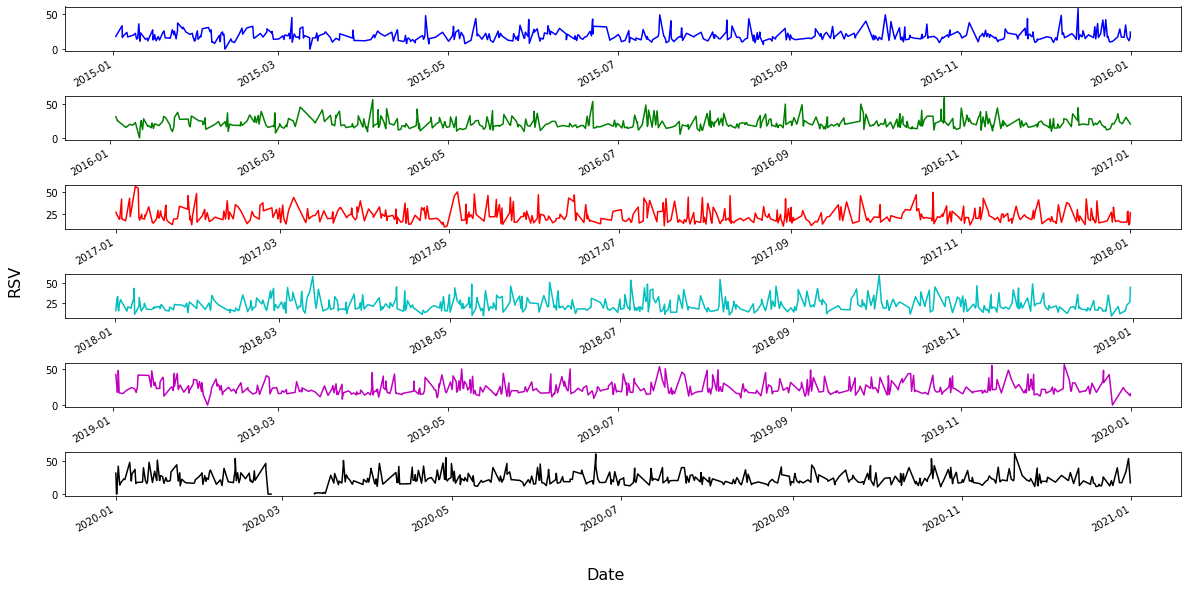

In [67]:
# plot a sample of 500 for each year
np.random.seed(100)
fig, axs = plt.subplots(6,1)
plt.subplots_adjust(hspace=1)
years = [2015,2016,2017,2018,2019,2020]
c = ['b','g','r','c','m','k']
for i, dfs in enumerate(df_y):
    dfss = dfs[1].sample(500)
    dfss.RSV.plot( ax = axs[i], color = c[i], xlabel = '')


fig.text(0.5, 0.09, 'Date', ha='center', va='center', size = 16)
fig.text(0.09, 0.5, 'RSV', ha='center', va='center', rotation='vertical', size = 16)


In [128]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
# to plot a aggregated dataframe in subplots 
def scatterplot_df_agg(df, x_axis,y_axis, row, hue):  # row indicats subplots
    plt.rcParams['figure.figsize'] = [200, 100]
    g = sns.FacetGrid(df, hue=hue,row=row, palette = 'tab10', sharex=True,
              height=3, aspect=6)
    g.map_dataframe(sns.lineplot, "day_month", "RSV", color='r')
    g.map(sns.scatterplot, x_axis, y_axis) # we can change the scatter plot to other plots
    
    # if there are many xlabel we can show ervy n times
    n = 10
    for ind, label in enumerate(g.axes.flatten()[-1].get_xticklabels()):
        if ind % n == 0:  # every 10th label is kept
            label.set_visible(True)
        else:
            label.set_visible(False)
    p= plt.xticks(rotation = 90, size = 'medium')
    g.add_legend(fontsize = 10) 
    plt.show()

    

##### as just for 2016 and 2020 we have 29th of Feb I will remove it then it does not effect the line plot

In [129]:
index_29_feb = df_agg.loc[df_agg['day_month'] == '29-Feb'].index
df_agg.drop(list(index_29_feb), inplace =True)

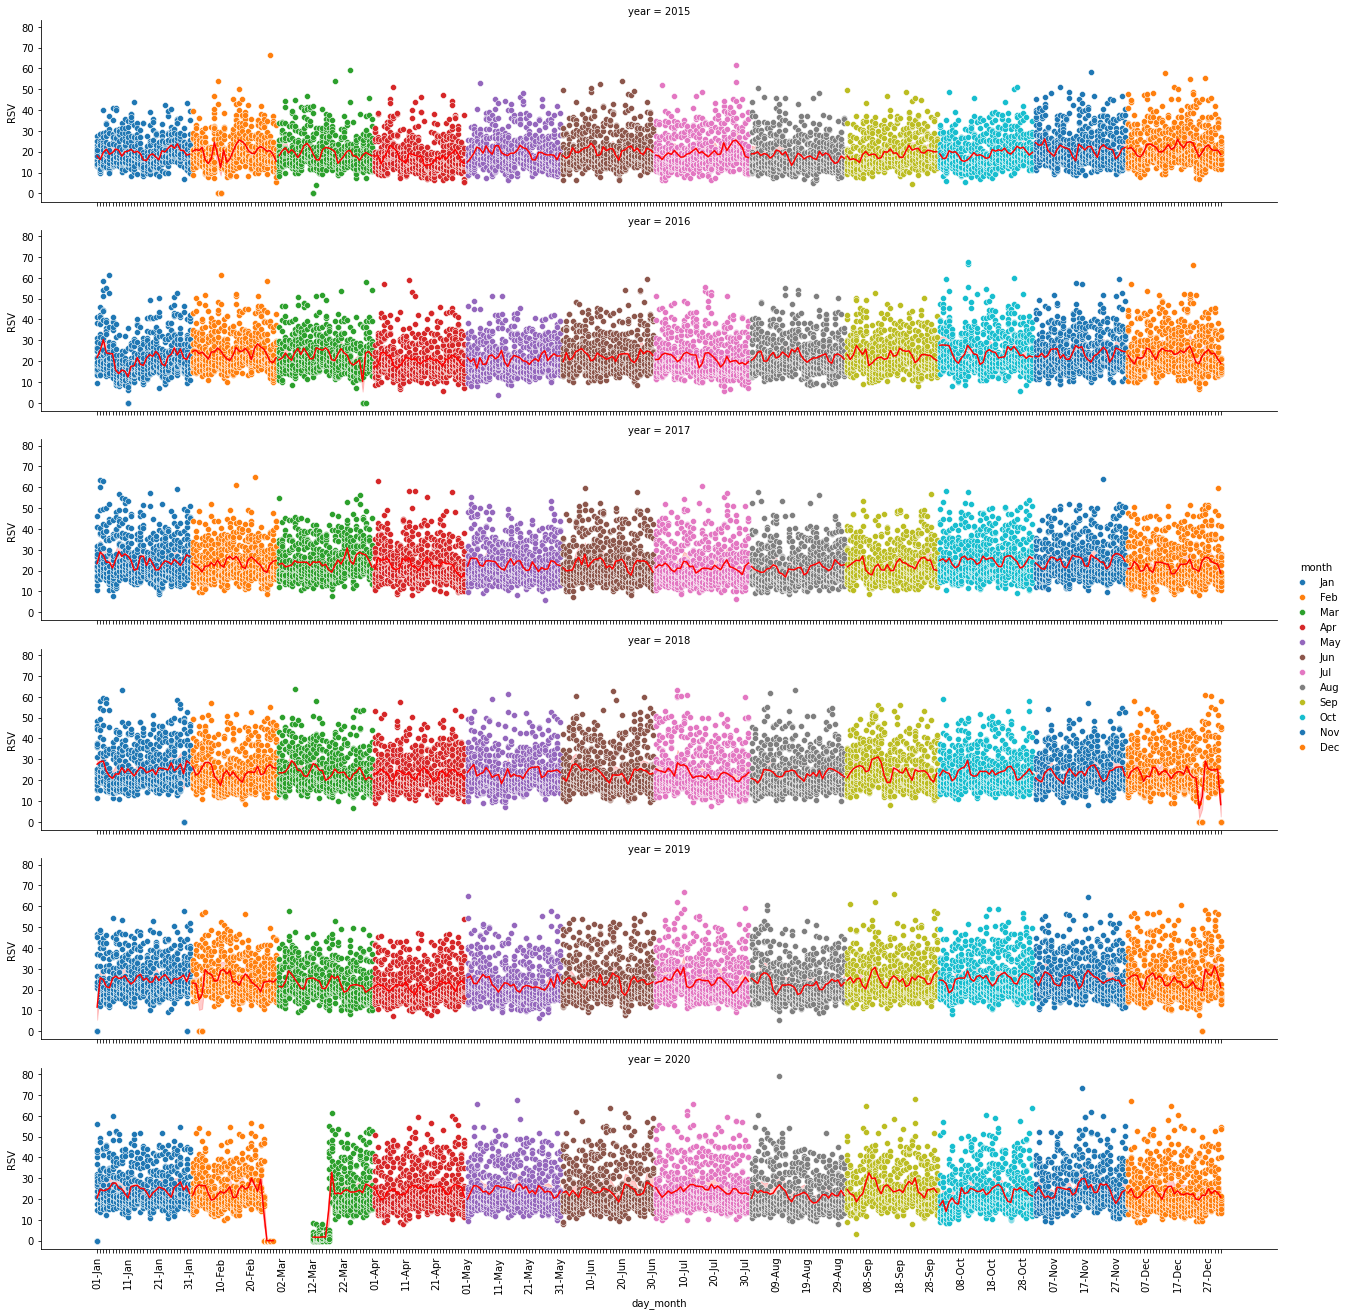

In [130]:
df = df_agg
hue='month'
row='year'
x_axis = 'day_month'
y_axis = 'RSV'
scatterplot_df_agg(df, x_axis,y_axis, row, hue)

### Plot RSV on daily basis, mean of a day

In [131]:
mean_day_month = df_agg.groupby(['day_month', 'year']).RSV.mean().unstack()

In [132]:
mean_day_month.head()

year,2015,2016,2017,2018,2019,2020
day_month,,,,,,
01-Apr,17.947917,17.111111,20.572917,22.777778,21.552083,25.527778
01-Aug,18.930556,20.440972,21.968750,20.770833,25.420139,20.423611
01-Dec,21.555556,22.812500,20.947917,21.038194,25.180556,22.927083
01-Feb,20.187500,24.618056,23.329861,26.371528,23.142361,21.809028
01-Jan,17.923611,21.781250,23.479167,27.631944,11.555556,20.559028


In [133]:
mean_day_month_melt = mean_day_month.melt(ignore_index = False)

In [134]:
mean_day_month_melt.head()

,year,value
day_month,,
01-Apr,2015,17.947917
01-Aug,2015,18.930556
01-Dec,2015,21.555556
01-Feb,2015,20.187500
01-Jan,2015,17.923611


In [136]:
mean_day_month_melt.reset_index(inplace = True)

In [138]:
mean_day_month_melt.head()

,day_month,year,value
0,01-Apr,2015,17.947917
1,01-Aug,2015,18.930556
2,01-Dec,2015,21.555556
3,01-Feb,2015,20.187500
4,01-Jan,2015,17.923611


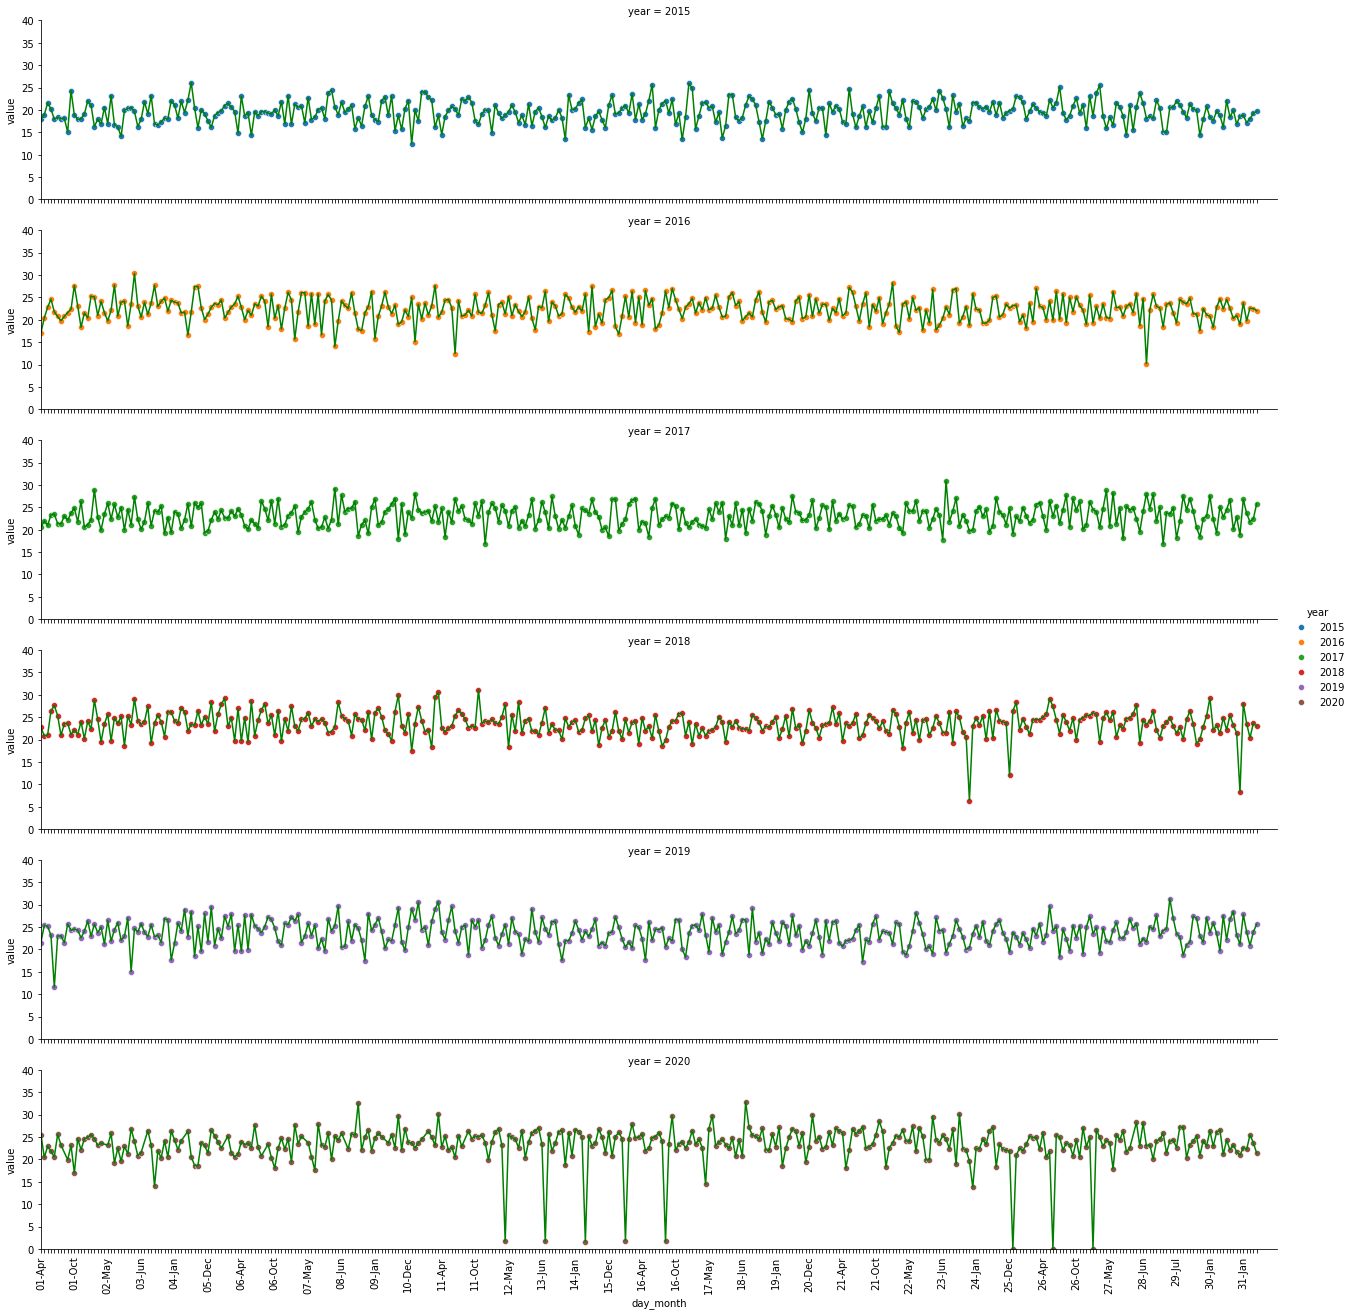

In [141]:
g = sns.FacetGrid(mean_day_month_melt, hue='year',row='year', palette = 'tab10',
                  sharex=True, ylim=(0,40),xlim = (0,370),
          height=3, aspect=6)
g.map_dataframe(sns.lineplot, "day_month", "value", color='g')
g.map(sns.scatterplot,"day_month", "value")
n = 10
for ind, label in enumerate(g.axes.flatten()[-1].get_xticklabels()):
    if ind % n == 0:  # every 10th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
p= plt.xticks(rotation = 90, size = 'medium')
g.add_legend(fontsize = 10) 
plt.show()


In [17]:
# Import
from statsmodels.tsa.seasonal import seasonal_decompose

In [169]:
df_cluster_mean

,RSV
date,
2015-01-01 00:00:00,23.166667
2015-01-01 01:00:00,25.000000
2015-01-01 02:00:00,27.416667
2015-01-01 03:00:00,13.000000
2015-01-01 04:00:00,17.833333
...,...
2020-12-31 19:00:00,17.666667
2020-12-31 20:00:00,19.500000
2020-12-31 21:00:00,15.000000


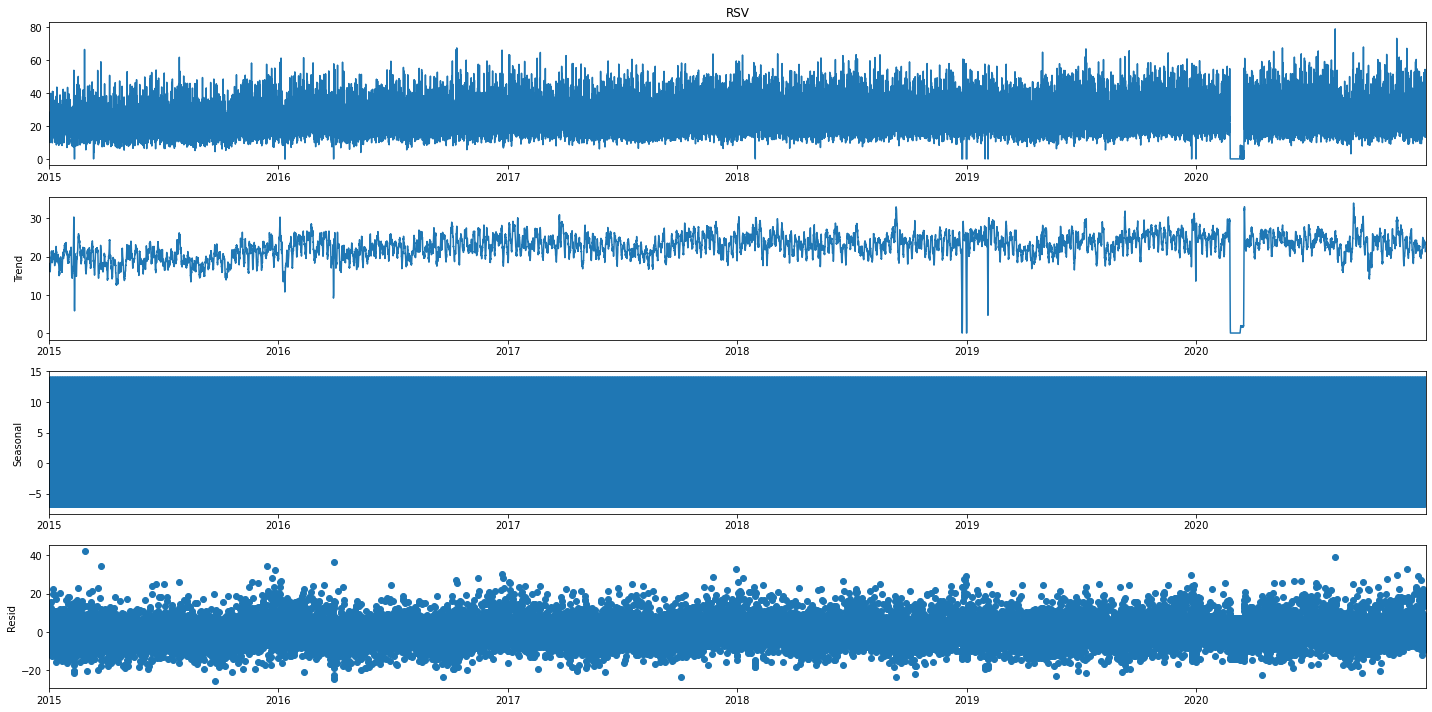

In [18]:
decomp_results = seasonal_decompose(df_cluster_mean['RSV'].fillna(0), period=24)
# Plot decomposed data
decomp_results.plot()
plt.show()

In [171]:
df_agg.head()

,year,month,day,hour,week,day_month,weekday,RSV
date,,,,,,,,
2015-01-01 00:00:00,2015,Jan,1,0,1,01-Jan,Thurs,23.166667
2015-01-01 01:00:00,2015,Jan,1,1,1,01-Jan,Thurs,25.000000
2015-01-01 02:00:00,2015,Jan,1,2,1,01-Jan,Thurs,27.416667
2015-01-01 03:00:00,2015,Jan,1,3,1,01-Jan,Thurs,13.000000
2015-01-01 04:00:00,2015,Jan,1,4,1,01-Jan,Thurs,17.833333


In [295]:
# # To see the result we sample a 20 percent of the whole plots
# np.random.seed(100)
# # sample_size = df_agg.shape[0]*.2
# df_sample = df_agg.sample(frac=0.3).sort_index()

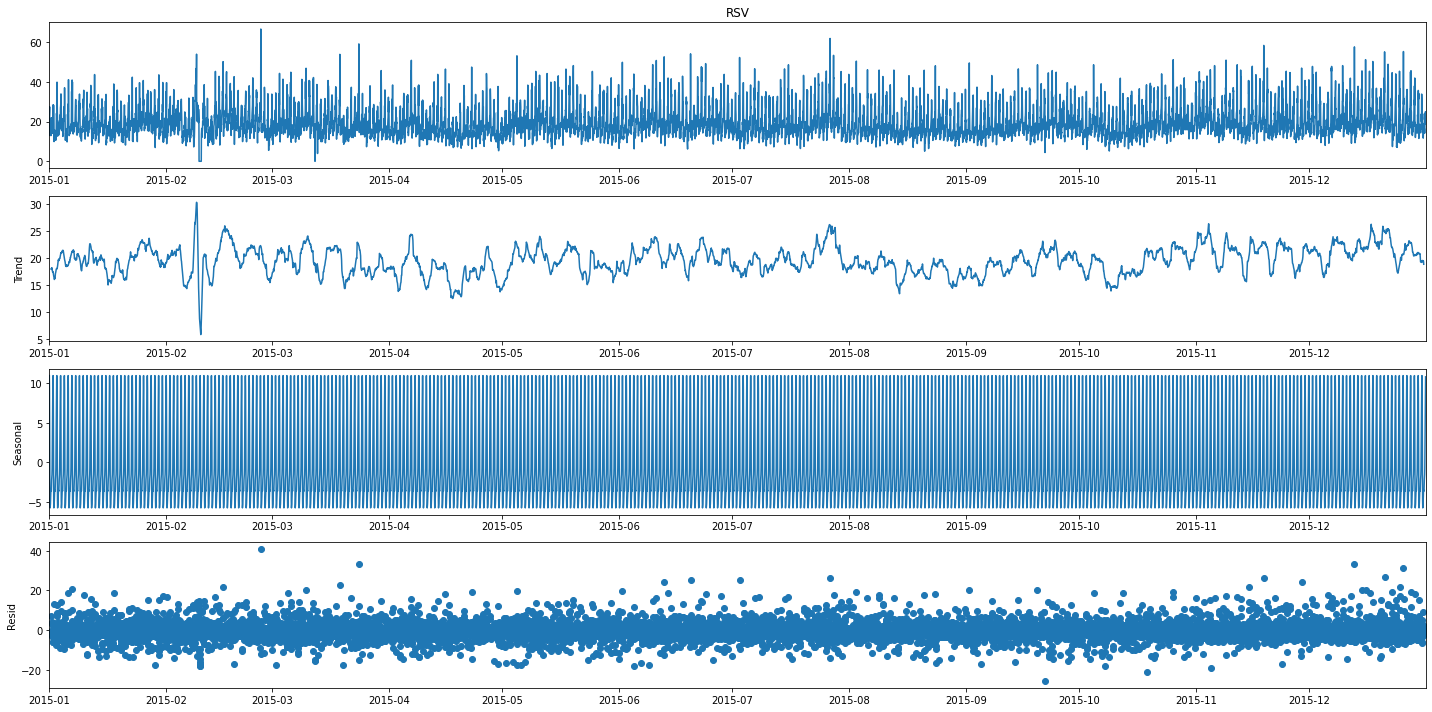

In [172]:
decomp_results = seasonal_decompose(df_agg.loc[df_agg.year == 2015]['RSV'], period=24)
# Plot decomposed data
decomp_results.plot()
plt.show()

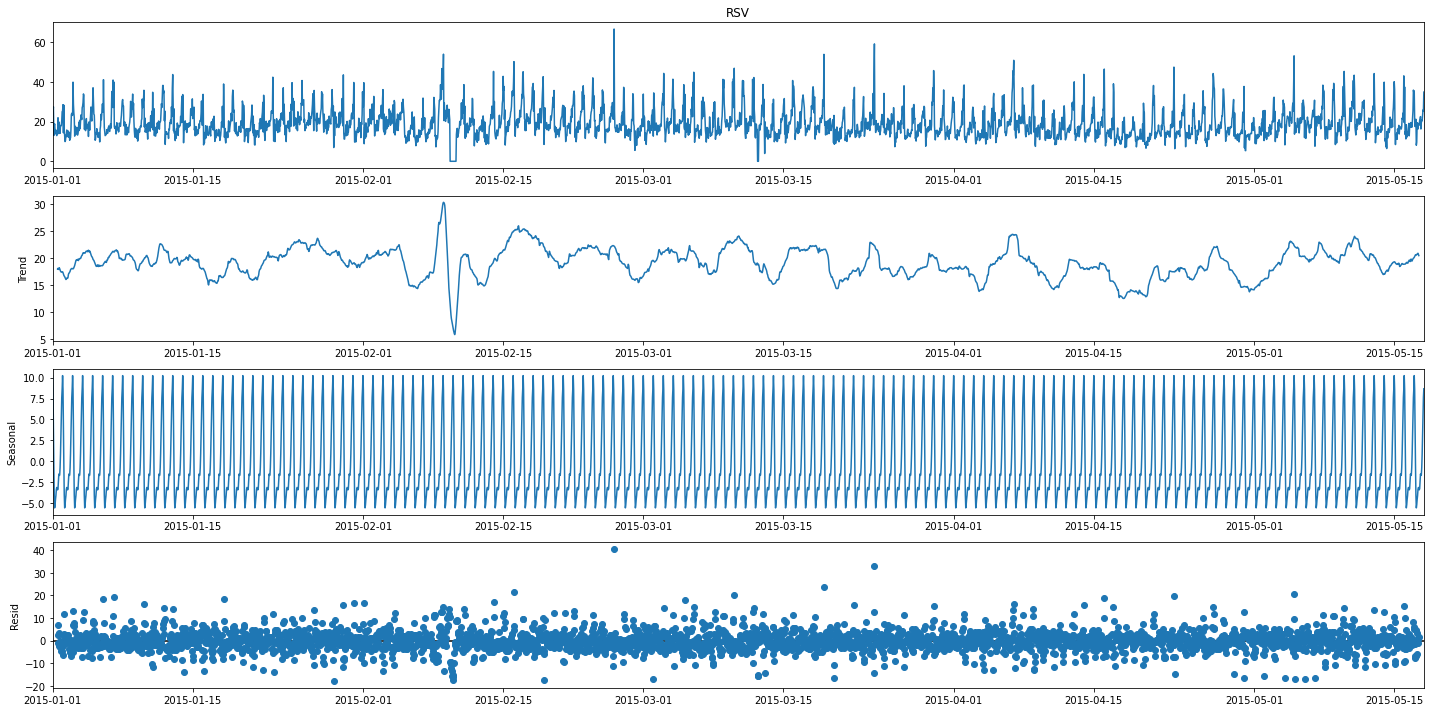

In [173]:
# plot it for the first 20 weeks of 2015
decomp_results = seasonal_decompose(df_agg.loc[(df_agg['week']<=20) & (df_agg.year == 2015)]['RSV'], period=24)
# Plot decomposed data
decomp_results.plot()
plt.show()

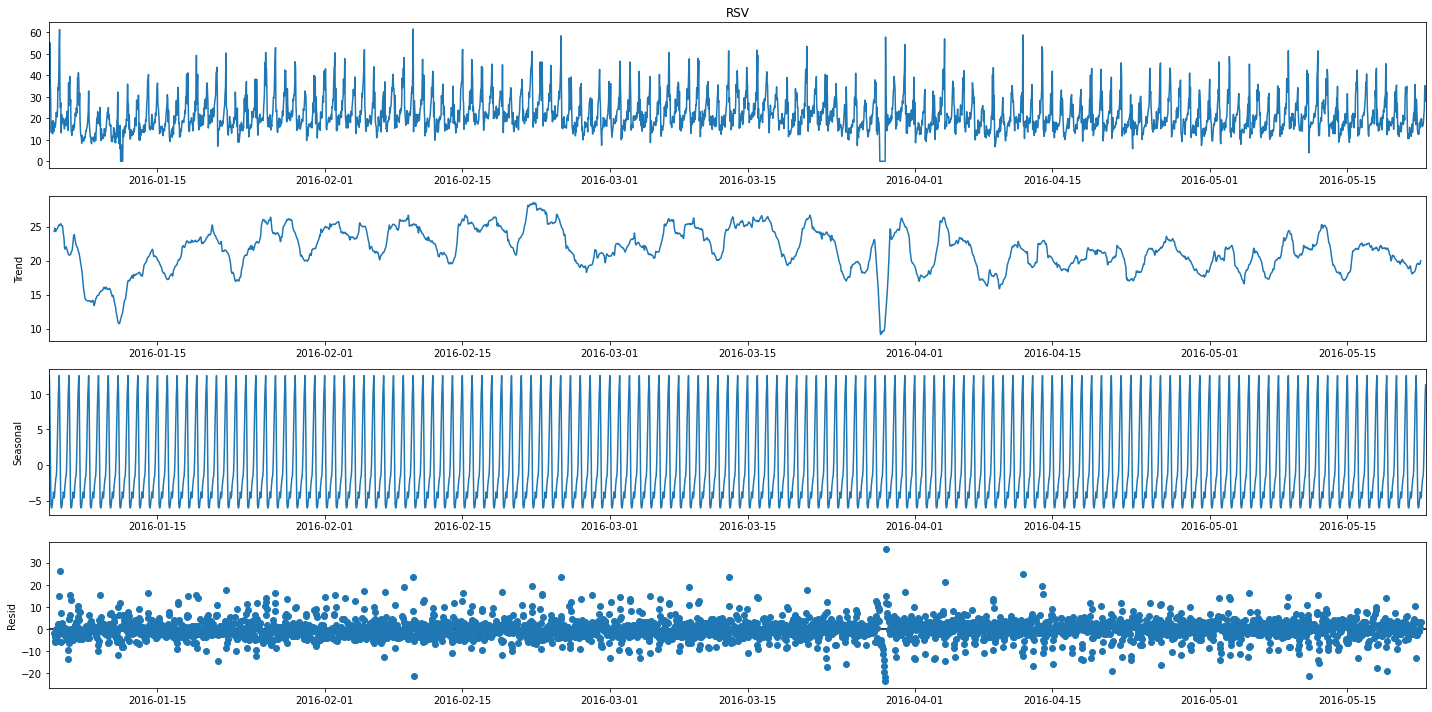

In [174]:
# plot it for the first 20 weeks of 2016
decomp_results = seasonal_decompose(df_agg.loc[(df_agg['week']<=20) & (df_agg.year == 2016)]['RSV'], period=24)
# Plot decomposed data
decomp_results.plot()
plt.show()

In [37]:
# Subtract long rolling average over N steps
N = 2
df_ = df_cluster_mean - df_cluster_mean.rolling(N).mean()
# Drop NaN values
df_ = df_.dropna()

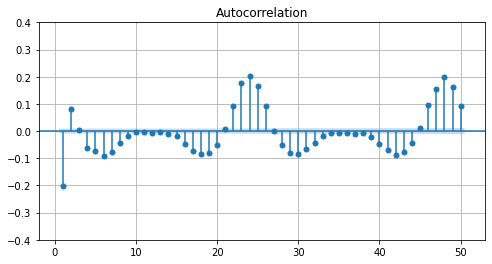

In [38]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, ax = plt.subplots(1,1, figsize=(8,4))
# Plot ACF
plot_acf(df_, ax=ax, lags=50, zero=False)
ax.axis(ymin=-0.4,ymax=0.4)
plt.grid()
plt.show()


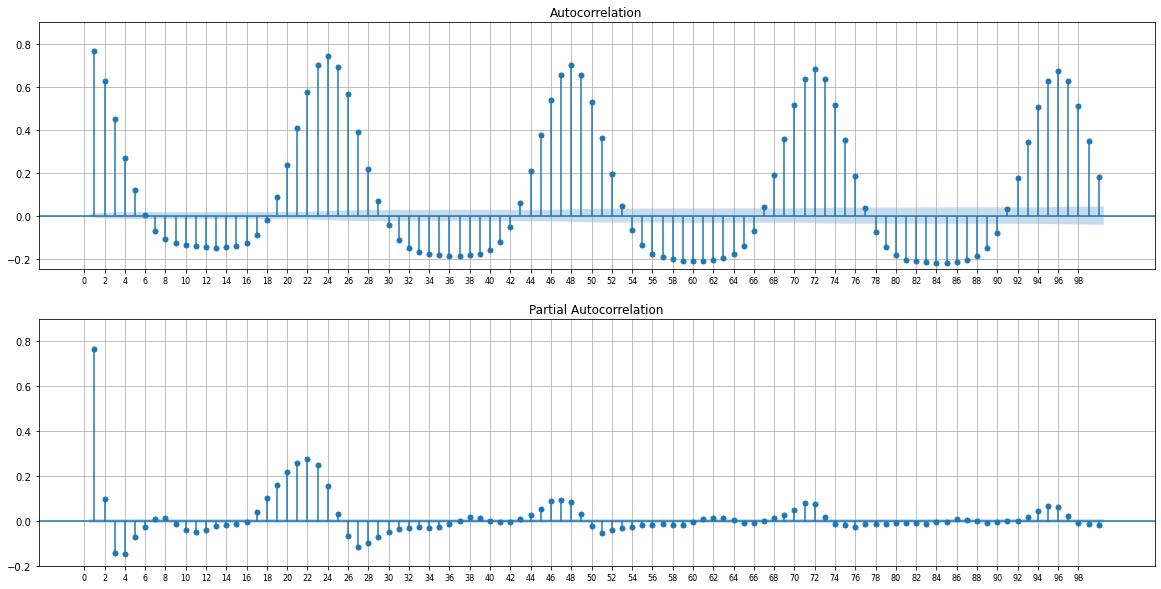

In [39]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot ACF
plot_acf(df_cluster_mean.dropna(), ax=ax1, lags=100, zero=False)
plot_pacf(df_cluster_mean.dropna(), ax=ax2, lags=100, zero=False)
# ax.axis(ymin=-0.4,ymax=0.2)

ax1.axis(ymin=-.25,ymax=0.9)
ax2.axis(ymin=-0.2,ymax=.9)
ax1.set_xticks(range(0,100,2))
ax1.set_xticklabels(range(0,100,2) ,fontsize=8)
ax2.grid()
ax2.set_xticks(range(0,100,2))
ax2.set_xticklabels(range(0,100,2) ,fontsize=8)
ax1.grid()
plt.show()
plt.show()

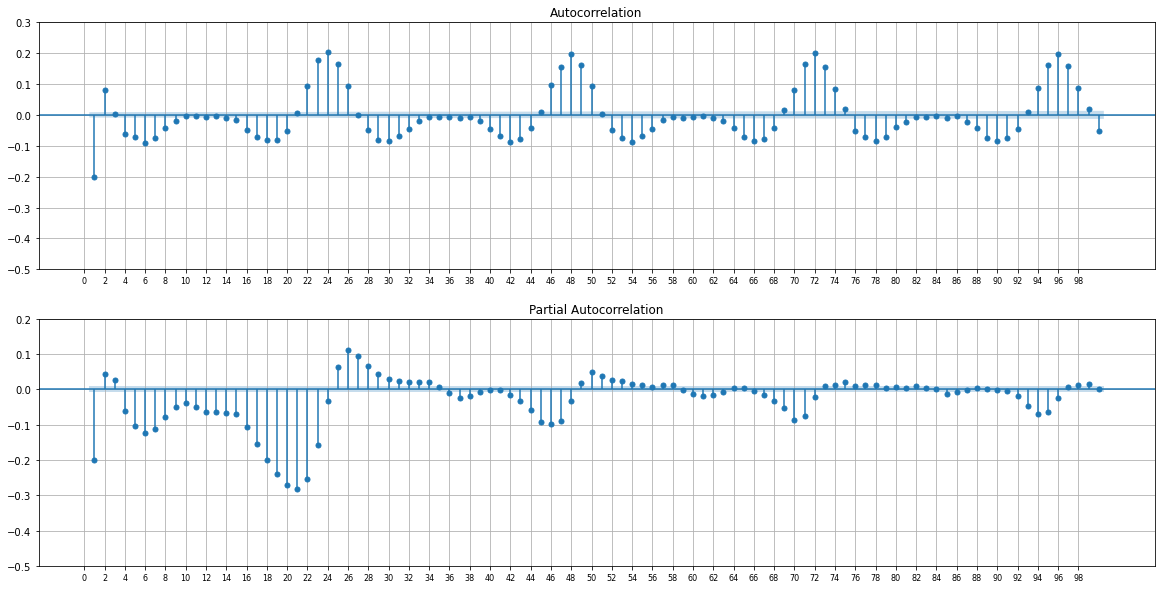

In [40]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot ACF
plot_acf(df_.dropna(), ax=ax1, lags=100, zero=False)
plot_pacf(df_.dropna(), ax=ax2, lags=100, zero=False)
# ax.axis(ymin=-0.4,ymax=0.2)

ax1.axis(ymin=-.5,ymax=0.3)
ax2.axis(ymin=-0.5,ymax=.2)
ax1.set_xticks(range(0,100,2))
ax1.set_xticklabels(range(0,100,2) ,fontsize=8)
ax2.grid()
ax2.set_xticks(range(0,100,2))
ax2.set_xticklabels(range(0,100,2) ,fontsize=8)
ax1.grid()
plt.show()
plt.show()

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def acf_pacf_plot(df, lags, n): # n: number of repeat of the lags for the plot
    # Create figure
    fig, (ax1, ax2) = plt.subplots(2,1)
    # Plot seasonal ACF
    plot_acf(df, lags=lags*n, ax=ax1,  zero = False)
    # Plot seasonal PACF
    plot_pacf(df, lags=lags*n, ax=ax2,  zero = False)
#     ax1.axis(ymin=-.1,ymax=0.25)
#     ax2.axis(ymin=-0.2,ymax=.1)
    ax1.set_xticks(range(0,lags*n,2))
    ax1.set_xticklabels(range(0,lags*n,2) ,rotation = 90, fontsize=8)
    ax2.grid()
    ax2.set_xticks(range(0,lags*n,2))
    ax2.set_xticklabels(range(0,lags*n,2) ,rotation = 90, fontsize=8)
    ax1.grid()
    plt.show()
    

In [377]:
# acf_pacf_plot(df_, 168, 1)

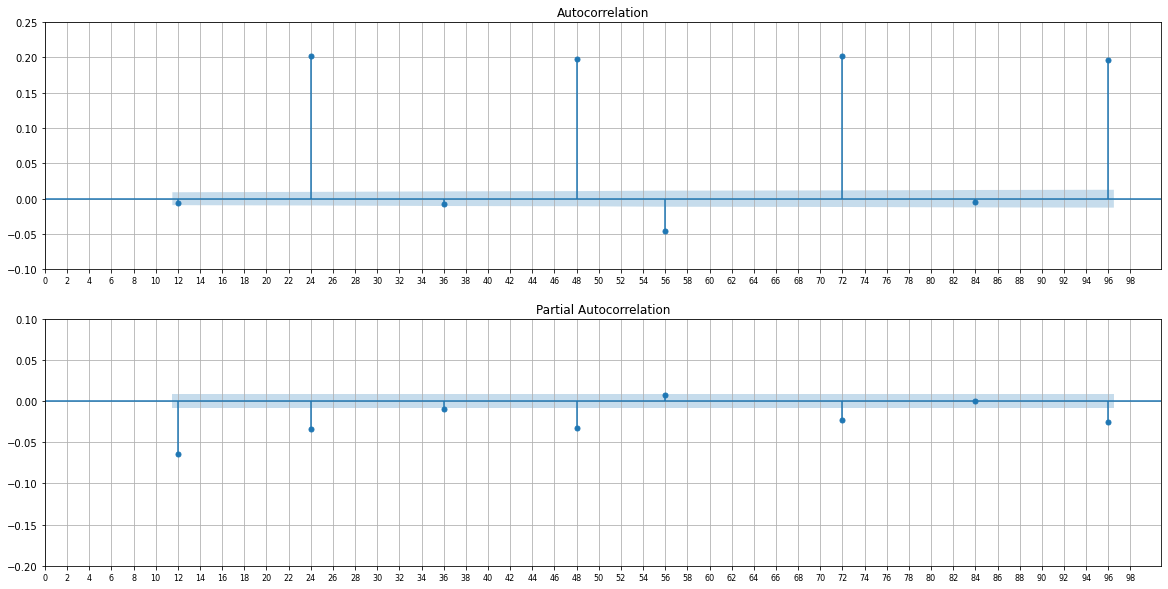

In [42]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot seasonal ACF
plot_acf(df_, lags=[12,24,36,48,56,72,84,96], ax=ax1)
# Plot seasonal PACF
plot_pacf(df_, lags=[12,24,36,48,56,72,84,96], ax=ax2)
ax1.axis(ymin=-.1,ymax=0.25)
ax2.axis(ymin=-0.2,ymax=.1)
ax1.set_xticks(range(0,100,2))
ax1.set_xticklabels(range(0,100,2) ,fontsize=8)
ax2.grid()
ax2.set_xticks(range(0,100,2))
ax2.set_xticklabels(range(0,100,2) ,fontsize=8)
ax1.grid()
plt.show()

## it is very clear that there is a seasonal pattern of 24 hours 
### Fit a model for hourly based data with 24 period

In [74]:
# to see if there is monthly period
multiply = 30*24 
lags = [i*multiply for i in [1,2,3,4,5,6,7,8,9,10,11,12]]

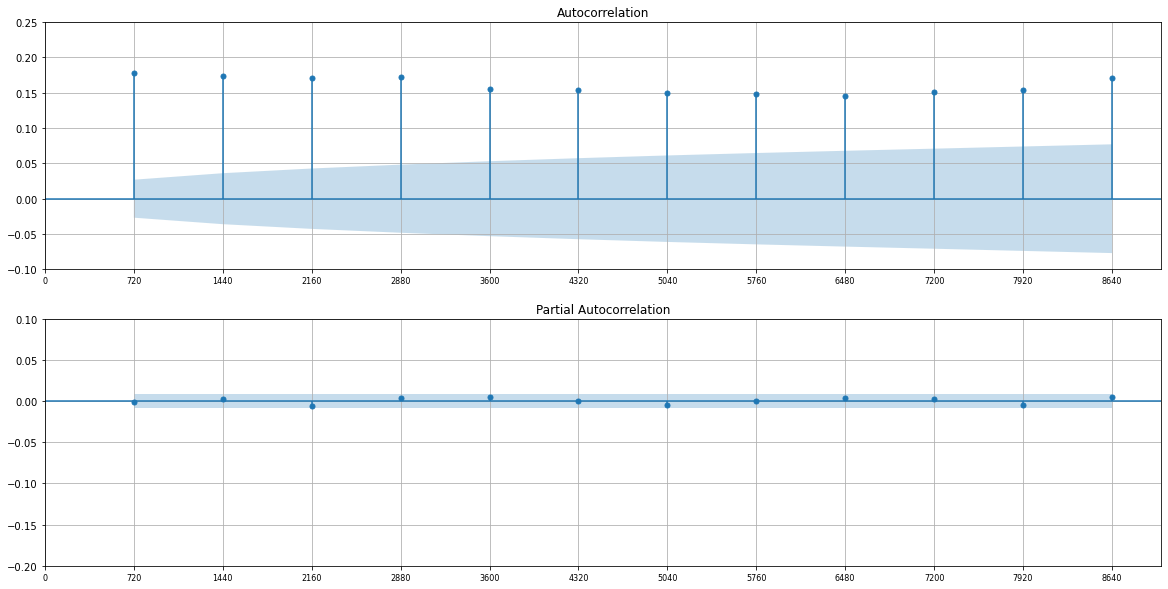

In [53]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot seasonal ACF
plot_acf(df_, lags=lags, ax=ax1)
# Plot seasonal PACF
plot_pacf(df_, lags=lags, ax=ax2)
ax1.axis(ymin=-.1,ymax=0.25)
ax2.axis(ymin=-0.2,ymax=.1)
ax1.set_xticks(range(0,lags[-1]+multiply,multiply))
ax1.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax2.grid()
ax2.set_xticks(range(0,lags[-1]+multiply,multiply))
ax2.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax1.grid()
plt.show()

In [54]:
multiply = 30*12
lags = [i*multiply for i in [1,2,3,4,5,6,7,8,9,10,11,12]]

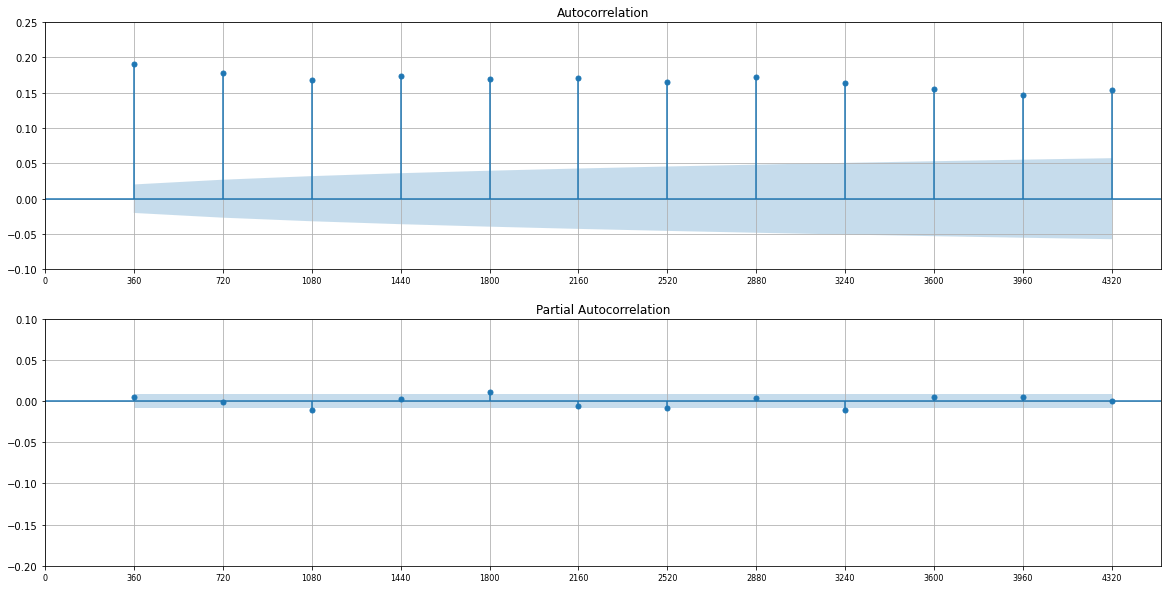

In [55]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot seasonal ACF
plot_acf(df_, lags=lags, ax=ax1)
# Plot seasonal PACF
plot_pacf(df_, lags=lags, ax=ax2)
ax1.axis(ymin=-.1,ymax=0.25)
ax2.axis(ymin=-0.2,ymax=.1)
ax1.set_xticks(range(0,lags[-1]+multiply,multiply))
ax1.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax2.grid()
ax2.set_xticks(range(0,lags[-1]+multiply,multiply))
ax2.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax1.grid()
plt.show()

### to find out daily base period 

In [69]:
df_agg

,year,month,day,hour,week,day_month,day_month_year,weekday,RSV
date,,,,,,,,,
2015-01-01 00:00:00,2015,Jan,1,0,1,01-Jan,01-Jan-2015,Thurs,23.166667
2015-01-01 01:00:00,2015,Jan,1,1,1,01-Jan,01-Jan-2015,Thurs,25.000000
2015-01-01 02:00:00,2015,Jan,1,2,1,01-Jan,01-Jan-2015,Thurs,27.416667
2015-01-01 03:00:00,2015,Jan,1,3,1,01-Jan,01-Jan-2015,Thurs,13.000000
2015-01-01 04:00:00,2015,Jan,1,4,1,01-Jan,01-Jan-2015,Thurs,17.833333
...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,2020,Dec,31,19,53,31-Dec,31-Dec-2020,Thurs,17.666667
2020-12-31 20:00:00,2020,Dec,31,20,53,31-Dec,31-Dec-2020,Thurs,19.500000
2020-12-31 21:00:00,2020,Dec,31,21,53,31-Dec,31-Dec-2020,Thurs,15.000000


In [73]:
df_daily = pd.DataFrame(df_agg.groupby('day_month_year').RSV.mean())
df_daily

,RSV
day_month_year,
01-Apr-2015,17.947917
01-Apr-2016,17.111111
01-Apr-2017,20.572917
01-Apr-2018,22.777778
01-Apr-2019,21.552083
...,...
31-Oct-2016,22.013889
31-Oct-2017,25.795139
31-Oct-2018,22.979167


In [91]:
multiply = 15 # half a month
lags = [i*multiply for i in range(1,70)]

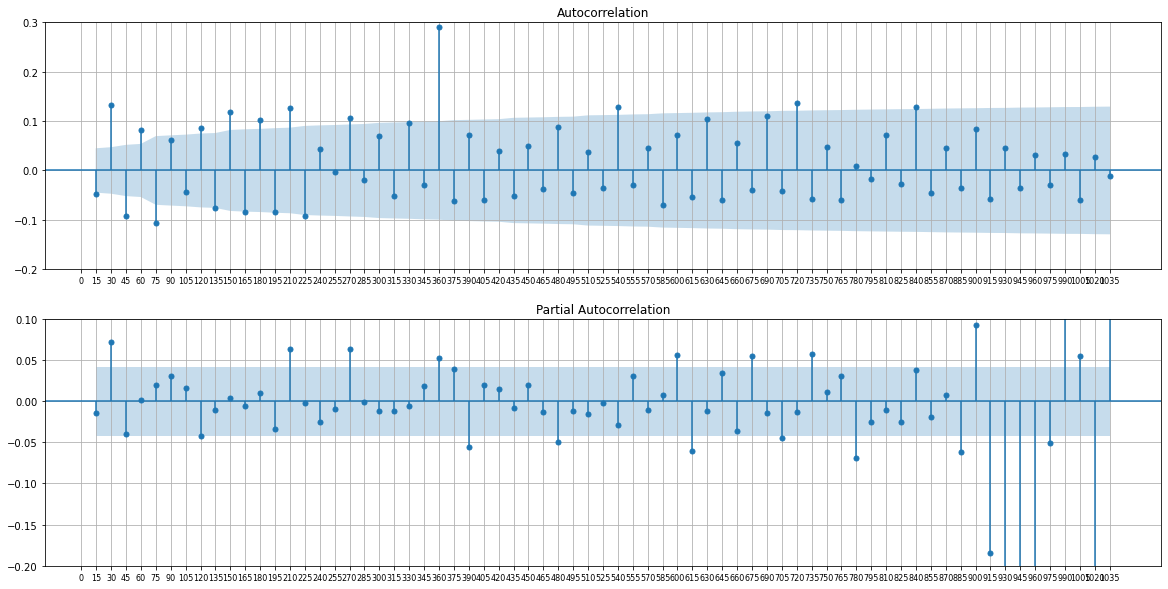

In [92]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot seasonal ACF
plot_acf(df_daily, lags=lags, ax=ax1)
# Plot seasonal PACF
plot_pacf(df_daily, lags=lags, ax=ax2)
ax1.axis(ymin=-.2,ymax=0.3)
ax2.axis(ymin=-0.2,ymax=.1)
ax1.set_xticks(range(0,lags[-1]+multiply,multiply))
ax1.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax2.grid()
ax2.set_xticks(range(0,lags[-1]+multiply,multiply))
ax2.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax1.grid()
plt.show()

In [ ]:
# I acn not see any daily period

### to find out daily monthly period 

In [93]:
df_agg

,year,month,day,hour,week,day_month,day_month_year,weekday,RSV
date,,,,,,,,,
2015-01-01 00:00:00,2015,Jan,1,0,1,01-Jan,01-Jan-2015,Thurs,23.166667
2015-01-01 01:00:00,2015,Jan,1,1,1,01-Jan,01-Jan-2015,Thurs,25.000000
2015-01-01 02:00:00,2015,Jan,1,2,1,01-Jan,01-Jan-2015,Thurs,27.416667
2015-01-01 03:00:00,2015,Jan,1,3,1,01-Jan,01-Jan-2015,Thurs,13.000000
2015-01-01 04:00:00,2015,Jan,1,4,1,01-Jan,01-Jan-2015,Thurs,17.833333
...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,2020,Dec,31,19,53,31-Dec,31-Dec-2020,Thurs,17.666667
2020-12-31 20:00:00,2020,Dec,31,20,53,31-Dec,31-Dec-2020,Thurs,19.500000
2020-12-31 21:00:00,2020,Dec,31,21,53,31-Dec,31-Dec-2020,Thurs,15.000000


In [94]:
month_year = [f'{m}-{y}' for m , y in zip(df_agg.month, df_agg.year) ]
df_agg.insert(6, 'month_year',month_year)

In [95]:
df_agg

,year,month,day,hour,week,day_month,month_year,day_month_year,weekday,RSV
date,,,,,,,,,,
2015-01-01 00:00:00,2015,Jan,1,0,1,01-Jan,Jan-2015,01-Jan-2015,Thurs,23.166667
2015-01-01 01:00:00,2015,Jan,1,1,1,01-Jan,Jan-2015,01-Jan-2015,Thurs,25.000000
2015-01-01 02:00:00,2015,Jan,1,2,1,01-Jan,Jan-2015,01-Jan-2015,Thurs,27.416667
2015-01-01 03:00:00,2015,Jan,1,3,1,01-Jan,Jan-2015,01-Jan-2015,Thurs,13.000000
2015-01-01 04:00:00,2015,Jan,1,4,1,01-Jan,Jan-2015,01-Jan-2015,Thurs,17.833333
...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,2020,Dec,31,19,53,31-Dec,Dec-2020,31-Dec-2020,Thurs,17.666667
2020-12-31 20:00:00,2020,Dec,31,20,53,31-Dec,Dec-2020,31-Dec-2020,Thurs,19.500000
2020-12-31 21:00:00,2020,Dec,31,21,53,31-Dec,Dec-2020,31-Dec-2020,Thurs,15.000000


In [96]:
df_monthy = pd.DataFrame(df_agg.groupby('month_year').RSV.mean())
df_monthy

,RSV
month_year,
Apr-2015,17.398727
Apr-2016,20.275231
Apr-2017,22.682523
Apr-2018,22.861690
Apr-2019,21.401157
...,...
Sep-2016,22.635648
Sep-2017,22.650579
Sep-2018,24.291088


In [99]:
multiply = 3 # every 3 month
lags = [i*multiply for i in range(12)]

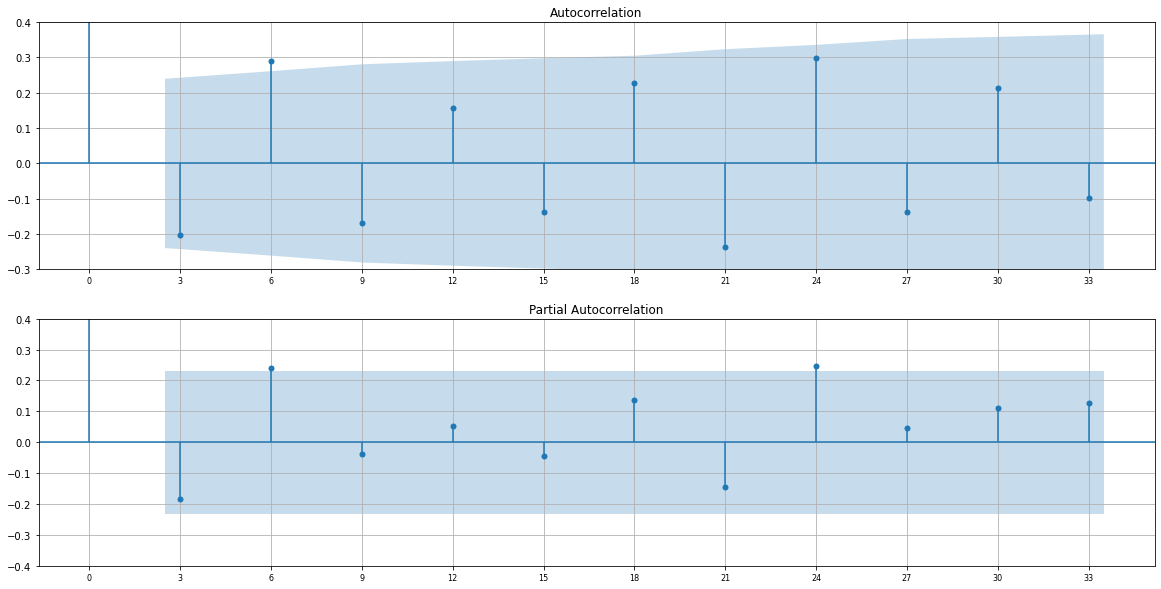

In [104]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1)
# Plot seasonal ACF
plot_acf(df_monthy, lags=lags, ax=ax1, zero = False)
# Plot seasonal PACF
plot_pacf(df_monthy, lags=lags, ax=ax2, zero = False)
ax1.axis(ymin=-.3,ymax=0.4)
ax2.axis(ymin=-0.4,ymax=.4)
ax1.set_xticks(range(0,lags[-1]+multiply,multiply))
ax1.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax2.grid()
ax2.set_xticks(range(0,lags[-1]+multiply,multiply))
ax2.set_xticklabels(range(0,lags[-1]+multiply,multiply) ,fontsize=8)
ax1.grid()
plt.show()